# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$ 

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках. 

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [ ]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек 
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [ ]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [ ]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

In [ ]:
def MNK(X, Y):
  # вычисляем коэффициенты
  mx = X.sum()/len(X)
  my = Y.sum()/len(Y)
  a2 = np.dot(X.T, X)/len(X)
  a1 = np.dot(X.T, Y)/len(X)
  
  w = (a1 - mx * my)/(a2 - mx**2)
  b = my - w * mx

  return w, b

w1, b1 = MNK(X_train, y_train)

def MSE(X, Y, w, b):
  sum = 0
  for i in range (0, len(X)):
      sum += ((X[i] * w + b) - Y[i])**2
  sum = sum / len(X)
  return sum

def MAE(X, Y, w, b):
  sum = 0
  for i in range (0, len(X)):
      sum += abs((X[i] * w + b) - Y[i])
  sum = sum / len(X)
  return sum

print("w: ", w1[0][0],"\nb: ", b1[0][0])
print("MSE Train: ", MSE(X_train, y_train, w1, b1)[0][0])
print("MSE Test: ", MSE(X_test, y_test, w1, b1)[0][0])
print("MAE Train: ", MAE(X_train, y_train, w1, b1)[0][0])
print("MAE Test: ", MAE(X_test, y_test, w1, b1)[0][0])

w:  9.531473904865276 
b:  -6.715869442517908
MSE Train:  68.13513801422312
MSE Test:  79.42940182694664
MAE Train:  6.51909698770277
MAE Test:  6.86856002763379


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train) # обучение модели

w2 = model.coef_
b2 = model.intercept_

In [ ]:
w2, b2

(array([9.5314739]), -6.715869442517908)

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  68.1351380142231
Test MSE:  79.42940182694666


In [ ]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  6.519096987702767
Test MAE:  6.86856002763379


In [ ]:
print("MY MSE Train: ", MSE(X_train, y_train, w1, b1)[0][0])
print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print("MY MSE Test: ", MSE(X_test, y_test, w1, b1)[0][0])
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

print("MY MAE Train: ", MAE(X_train, y_train, w1, b1)[0][0])
print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print("MY MAE Test: ", MAE(X_test, y_test, w1, b1)[0][0])
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

MY MSE Train:  68.13513801422312
Train MSE:  68.1351380142231
MY MSE Test:  79.42940182694664
Test MSE:  79.42940182694666
MY MAE Train:  6.51909698770277
Train MAE:  6.519096987702767
MY MAE Test:  6.86856002763379
Test MAE:  6.86856002763379


## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [ ]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [ ]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE

In [ ]:
w1, b1 = MNK(data['x_train'], data['y_train'])

w1, b1

(-0.2808046376357872, 1.934337021280731)

In [ ]:
MSE(data['x_train'], data['y_train'], w1, b1), MAE(data['x_train'], data['y_train'], w1, b1)

(0.28064494173165, 0.4431706061761908)

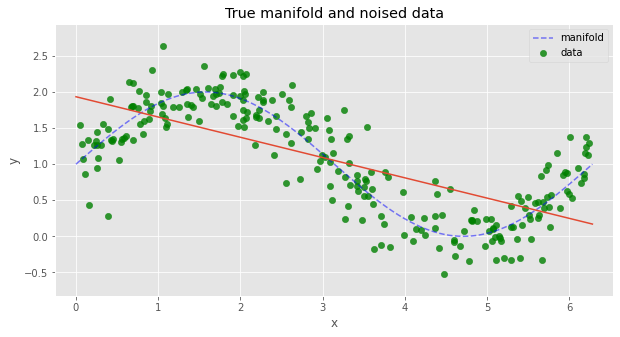

In [ ]:
plt.figure(figsize=(10, 5))
margin = 0.3
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right')
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data['support'], data['support'].reshape(-1, 1).dot(w1) + b1, label='predicted')
plt.show()

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \hat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$ 

## Задание 3.3

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней. 
### Полином какой степени подходит больше других? Почему?

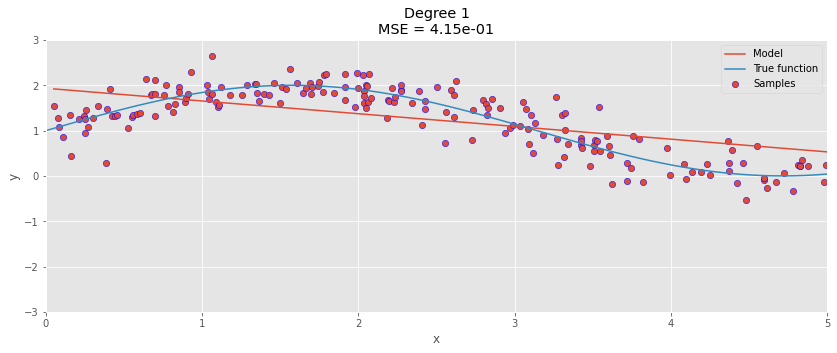

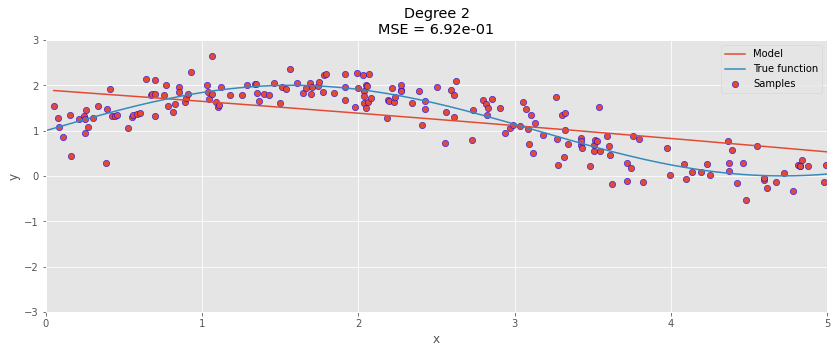

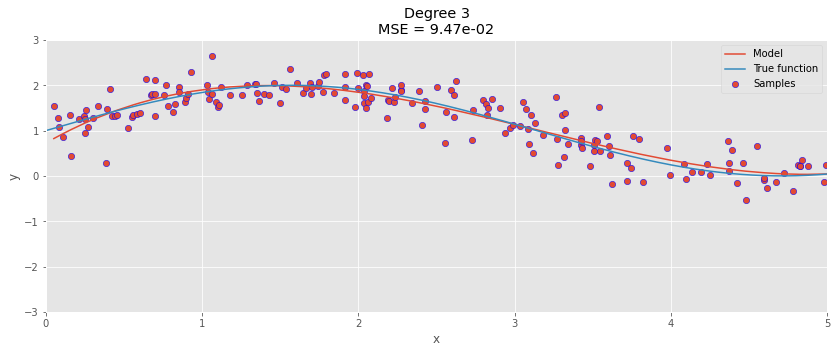

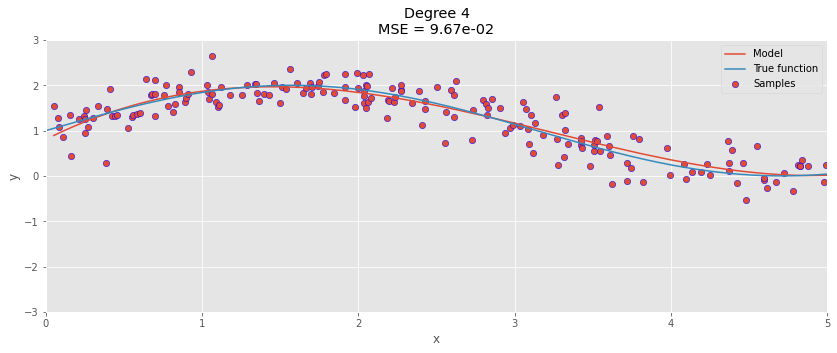

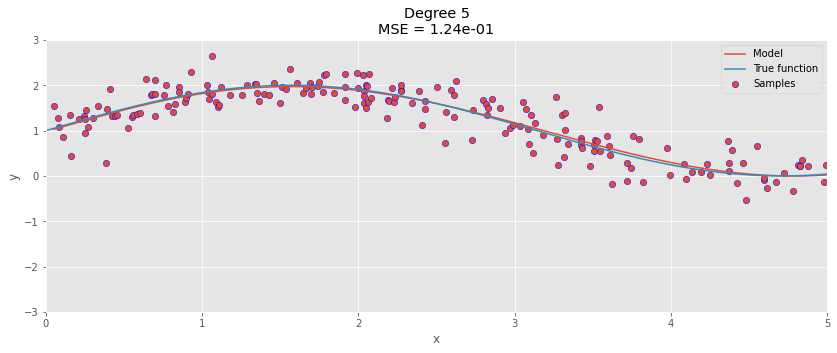

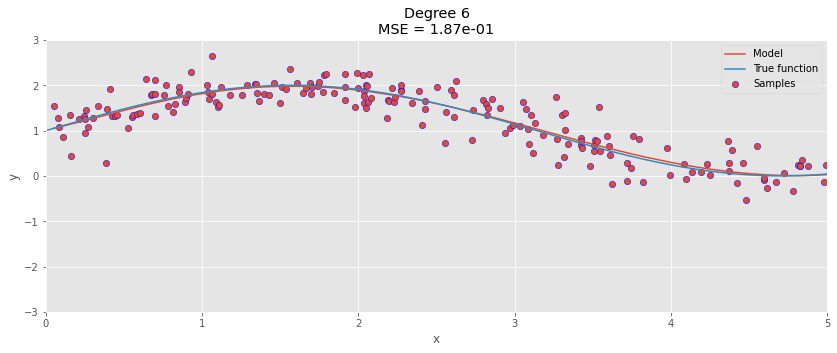

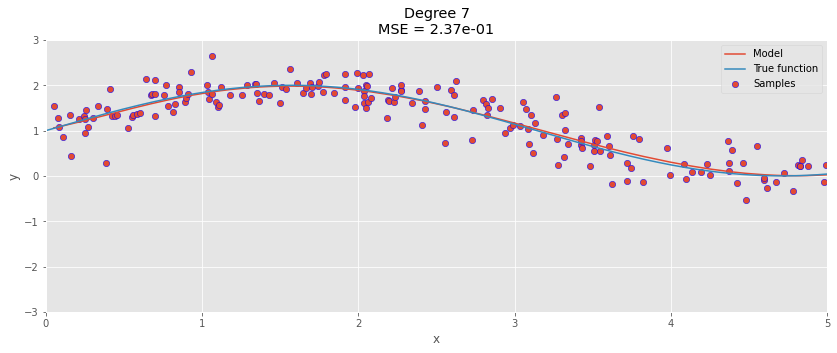

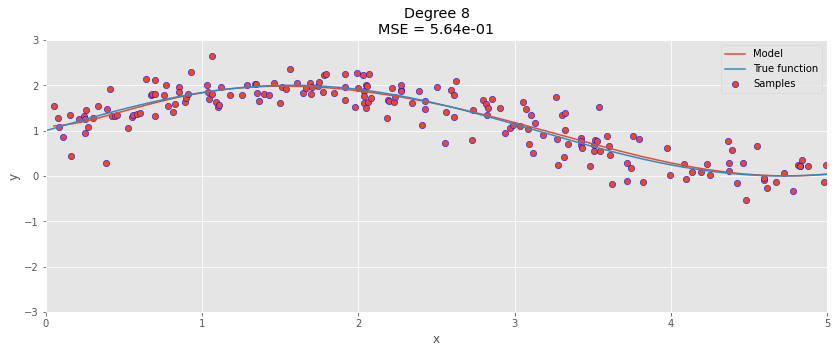

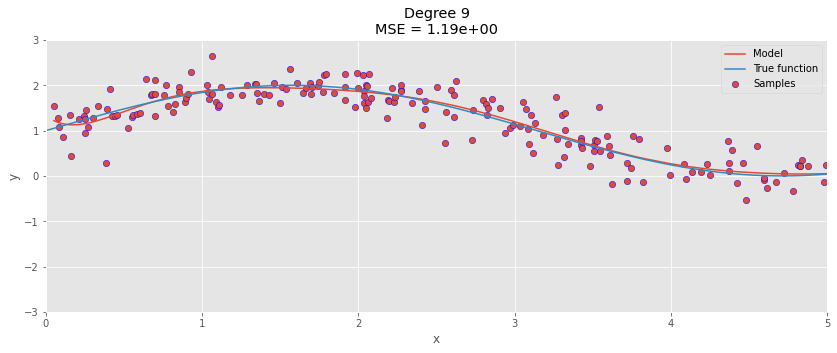

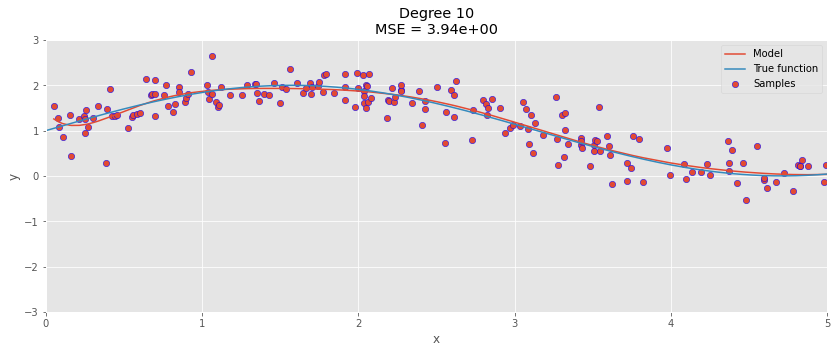

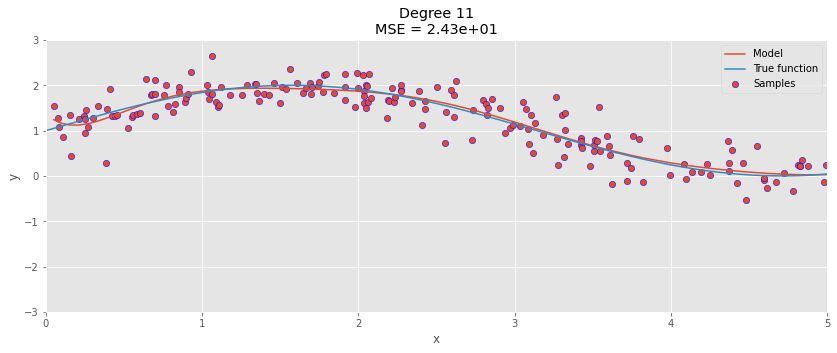

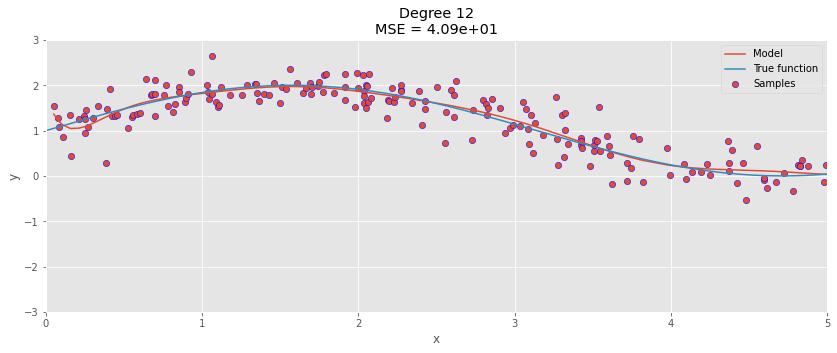

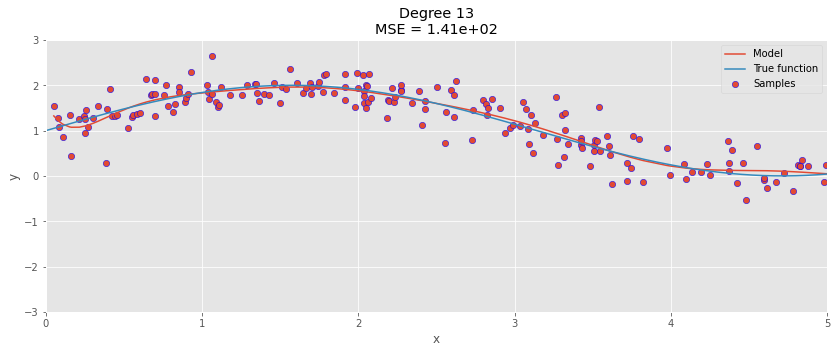

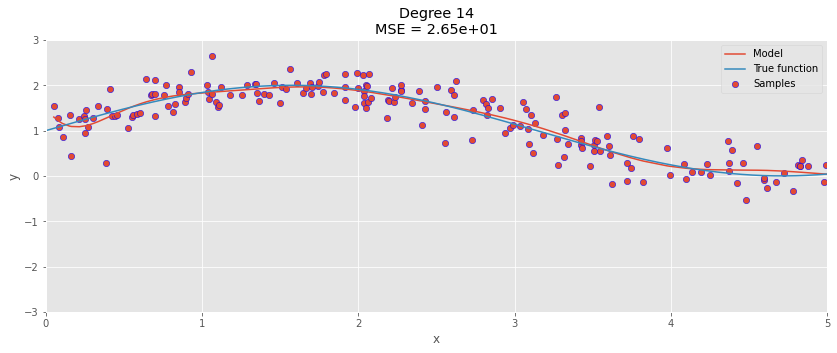

In [ ]:
X = data['x_train']
y = data['y_train']

def make_plot(i): 
  plt.figure(figsize=(14, 5))
  polynomial_features = PolynomialFeatures(degree=i,
                                              include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                          ("linear_regression", linear_regression)])
  pipeline.fit(X[:, np.newaxis], y)

  # Evaluate the models using crossvalidation
  scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                              scoring="neg_mean_squared_error", cv=10)
  result = scores.mean()

  X_test = np.linspace(0, 1, 100)
  plt.plot(X, pipeline.predict(X[:, np.newaxis]), label="Model")
  plt.plot(data['support'], data['values'], label="True function")
  plt.scatter(X, y, edgecolor='b', s=40, label="Samples")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.xlim((0, 5))
  plt.ylim((-3, 3))
  plt.legend(loc="best")
  plt.title("Degree {}\nMSE = {:.2e}".format(i, -scores.mean(), scores.std()))
  plt.show()
  return result, i


min_score = 10000
degree = 0
for i in range(1, 15):
  a, b = make_plot(i)
  if min_score >= abs(a):
    min_score = abs(a)
    degree = i


In [ ]:
min_score, degree

(0.09467456175871573, 3)

#Вывод
Лучше всего наша функция приближается многолченом 5 степени. Также неплохо она приближается многочленом 6 степени, о чем можно судить исходя из значения минимальной среднеквадратичной ошибки.Выбрали именно этот показатель, поскольку он очень остро реагирует на существенные отклонения предсказания от настоящего значения функции. На многочленах низких степеней модель является слишком примитивной, не подходящей для решения данной задачи. Модели, которые содержат в себе полиномы высоких степеней являются избыточно сложными, о чем и свидетельствуют высокие значения MSE.

# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

In [ ]:
from sklearn.datasets import load_boston


In [ ]:
house_data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

X1 = X
y1 = y
X1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
def LR_RealData(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  #стандартизация данных
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  #загрузка и обучение модели
  model = LinearRegression()
  model.fit(X_train, y_train)
  return (mean_absolute_error(y_train, model.predict(X_train)), mean_absolute_error(y_test, model.predict(X_test)), 
          mean_squared_error(y_train, model.predict(X_train)),  mean_squared_error(y_test, model.predict(X_test)), model.coef_)

In [ ]:
mae_train1, mae_test1, mse_train1, mse_test1, coef1 = LR_RealData(X, y)
mae_train1, mae_test1, mse_train1, mse_test1, coef1

(3.1753010192177675,
 3.5864341099185935,
 21.25190451564238,
 25.707469959981655,
 array([-0.60001747,  1.12659154,  0.26480352,  0.38674585, -1.80776562,
         2.93256706, -0.47241757, -3.2835866 ,  2.53738637, -2.18321208,
        -2.12731036,  0.97006714, -3.40043939]))

## Задание 3.4

In [ ]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого

In [ ]:
data = pd.DataFrame(data={"coefficients": coef1, "feats": X1.columns})
data = data.iloc[(-np.abs(data["coefficients"].values)).argsort()].head(7)
X1 = X1[data["feats"]]
X1

,LSTAT,DIS,RM,RAD,TAX,PTRATIO,NOX
0,4.98,4.0900,6.575,1.0,296.0,15.3,0.538
1,9.14,4.9671,6.421,2.0,242.0,17.8,0.469
2,4.03,4.9671,7.185,2.0,242.0,17.8,0.469
3,2.94,6.0622,6.998,3.0,222.0,18.7,0.458
4,5.33,6.0622,7.147,3.0,222.0,18.7,0.458
...,...,...,...,...,...,...,...
501,9.67,2.4786,6.593,1.0,273.0,21.0,0.573
502,9.08,2.2875,6.120,1.0,273.0,21.0,0.573
503,5.64,2.1675,6.976,1.0,273.0,21.0,0.573
504,6.48,2.3889,6.794,1.0,273.0,21.0,0.573


In [ ]:
mae_train2, mae_test2, mse_train2, mse_test2, coef2 = LR_RealData(X1, y1)
mae_train2, mae_test2, mse_train2, mse_test2, coef2

(3.5549632063962973,
 3.404203508341643,
 24.89130501445635,
 21.310476944353496,
 array([-4.46940734, -2.706496  ,  2.69593055,  1.60472182, -1.31224783,
        -2.21563498, -2.22936982]))

In [ ]:
print("MAE Train", "  Full: ", mae_train1, "  Part:  ", mae_train2)
print("MAE Test", "  Full: ", mae_test1, "  Part:  ", mae_test2)
print("MSE Train", "  Full: ", mse_train1, "  Part:  ", mse_train2)
print("MSE Test", "  Full: ", mse_test1, "  Part:  ", mse_test2)

MAE Train   Full:  3.1753010192177675   Part:   3.5549632063962973
MAE Test   Full:  3.5864341099185935   Part:   3.404203508341643
MSE Train   Full:  21.25190451564238   Part:   24.89130501445635
MSE Test   Full:  25.707469959981655   Part:   21.310476944353496


MAE и MSE на тренировочных данных меньше для полного датасета нежели на частичном.
На тестовых же данных, MAE и MSE больше на полном датасете нежели на частичном.